In [123]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop

## 데이터 불러오기

In [43]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

## 데이터 변환

In [44]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [54]:
trainX[0][0][0]

array([0], dtype=uint8)

In [45]:
train_X.shape

(60000, 28, 28)

In [46]:
trainX = train_X.reshape((train_X.shape[0], 28, 28, 1))
testX = test_X.reshape((test_X.shape[0], 28, 28, 1))
#trainX = trainX.astype('float32')/255.
#testX = testX.astype('float32')/255.

In [47]:
trainX[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [38]:
trainX[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [31]:
train_Y[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
trainY = tf.keras.utils.to_categorical(train_Y)
testY = tf.keras.utils.to_categorical(test_Y)

In [34]:
trainY[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [49]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


## 모델 생성

In [50]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [51]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=1, batch_size=32, validation_data=(testX, testY))

1875/1875 [==============================] - 7s 3ms/step - loss: 468.6943 - accuracy: 0.1074 - val_loss: 2.3013 - val_accuracy: 0.1135


## 데이터 정규화 후 학습

In [55]:
trainX2 = trainX.astype('float32')/255.
testX2 =ker testX.astype('float32')/255.

In [57]:
model2 = tf.keras.models.Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

In [154]:
opt = SGD(lr=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(trainX2, trainY, epochs=1, batch_size=32, validation_data=(testX2, testY))

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0639 - accuracy: 0.9811 - val_loss: 0.0730 - val_accuracy: 0.9774


In [155]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
def test(*args):
    for i, j in enumerate(*args):
        print(i, j)

In [60]:
test(1, 2, 3)

1 2 3


In [64]:
test(['mean_squared_error', 'accuracy'])

0 mean_squared_error
1 accuracy


In [191]:
class mnistLearner():
    def __init__(self, loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'], **kwargs):
        
        self.loss = loss
        self.optimizer = optimizer
        self.metrics = metrics

        if 'epochs' in kwargs.keys():
            self.epochs = kwargs['epochs']
        else:
            self.epochs = 10

        if 'batch_size' in kwargs.keys():
            self.batch_size = kwargs['batch_size']
        else:
            self.batch_size = 32


    def prepare_data(self):

        (train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()

        train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
        test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

        train_X = train_X.astype('float32')/255.
        test_X = test_X.astype('float32')/255.

        train_Y = tf.keras.utils.to_categorical(train_Y)
        test_Y = tf.keras.utils.to_categorical(test_Y)

        return train_X, test_X, train_Y, test_Y


    def set_optimizer(self, opt_name, lr=0.01):

        if opt_name == 'SGD':
            self.optimizer = SGD(lr)
        elif opt_name == 'RMSprop':
            self.optimizer = RMSprop(lr)


    def set_loss(self, loss_name):

        self.loss = loss_name
    

    def set_metrics(self, *args):
        
        self.metrics = list(*args)

    def build_model(self):

        self.model = tf.keras.models.Sequential()
        self.model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
        self.model.add(MaxPooling2D((2, 2)))
        self.model.add(Flatten())
        self.model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
        self.model.add(Dense(10, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)

    
    def learn_model(self, train_X, test_X, train_Y, test_Y):
        
        self.history = self.model.fit(train_X, train_Y, epochs=self.epochs, batch_size=self.batch_size, validation_data=(test_X, test_Y))

    
    def get_score(self, test_X, test_Y):

        score = self.model.evaluate(test_X, test_Y)

        return score

In [192]:
temp = mnistLearner(epochs=5, batch_size=64)

In [193]:
print('loss : ', temp.loss)
print('optimizer : ', temp.optimizer)
print('metrics : ', temp.metrics)
print('epochs : ', temp.epochs)
print('batch_size : ', temp.batch_size)

loss :  categorical_crossentropy
optimizer :  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x30c4c0760>
metrics :  ['accuracy']
epochs :  5
batch_size :  64


In [194]:
train_x, test_x, train_y, test_y = temp.prepare_data()

In [195]:
temp.build_model()

In [196]:
temp.model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [197]:
temp.learn_model(train_x, test_x, train_y, test_y)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.5676 - accuracy: 0.8391 - val_loss: 0.2186 - val_accuracy: 0.9365
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2075 - accuracy: 0.9419 - val_loss: 0.1572 - val_accuracy: 0.9537
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1573 - accuracy: 0.9553 - val_loss: 0.1409 - val_accuracy: 0.9603
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1266 - accuracy: 0.9647 - val_loss: 0.1219 - val_accuracy: 0.9643
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1141 - accuracy: 0.9679 - val_loss: 0.0976 - val_accuracy: 0.9713


In [198]:
temp.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [199]:
temp.history.history['loss']

[0.3563477396965027,
 0.19638437032699585,
 0.15331131219863892,
 0.127248615026474,
 0.10892773419618607]

In [202]:
import matplotlib.pyplot as plt

[]

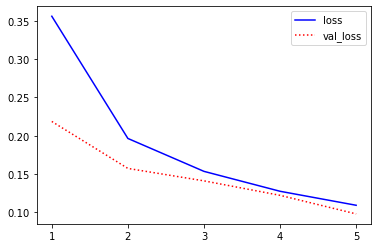

In [209]:
plt.plot(range(1, 6), temp.history.history['loss'], 'b-', label='loss')
plt.plot(range(1, 6), temp.history.history['val_loss'], 'r:', label='val_loss')
plt.legend(loc='upper right')
plt.xticks([1, 2, 3, 4, 5])
plt.plot()

[]

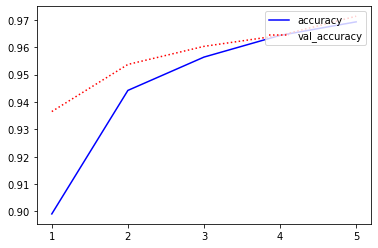

In [208]:
plt.plot(range(1, 6), temp.history.history['accuracy'], 'b-', label='accuracy')
plt.plot(range(1, 6), temp.history.history['val_accuracy'], 'r:', label='val_accuracy')
plt.legend(loc='upper right')
plt.xticks([1, 2, 3, 4, 5])
plt.plot()

In [200]:
score = temp.get_score(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9713


In [201]:
print(score)

[0.09761486947536469, 0.9713000059127808]
